In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")



![](1.png)

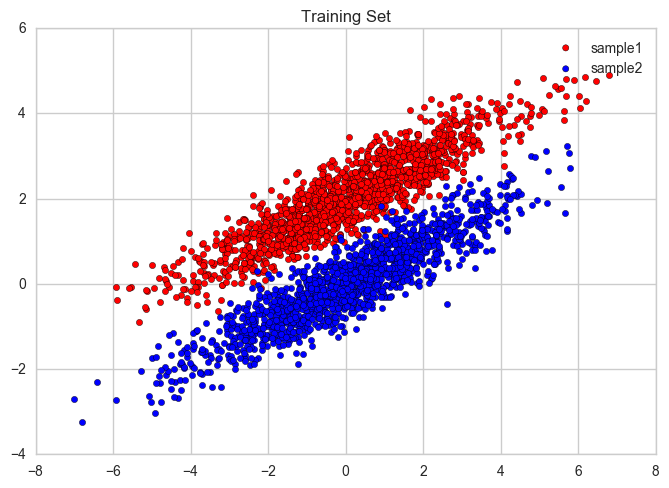

In [2]:
mean1 = [0,2]
mean2 = [0,0]
cov = [[4,1.8],[1.8,1]]
N = 1500
sample1_train = np.random.multivariate_normal(mean1, cov, N)
sample2_train = np.random.multivariate_normal(mean2, cov, N)
plt.title('Training Set')
plt.scatter(sample1_train[:,0],sample1_train[:,1],label='sample1',c = 'r')
plt.scatter(sample2_train[:,0],sample2_train[:,1],label='sample2',c ='b')
plt.legend()
sample1_test = np.random.multivariate_normal(mean1, cov, N)
sample2_test = np.random.multivariate_normal(mean2, cov, N)

sample_test = np.zeros((2*N,2))

sample_test[:N,:] = sample1_test
sample_test[N:,:] = sample2_test

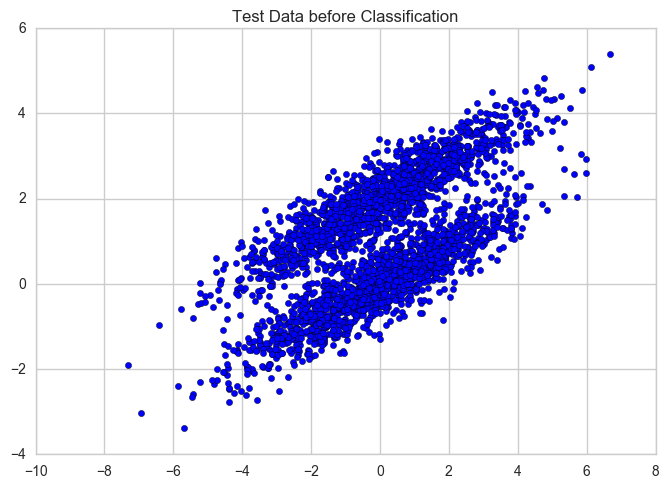

In [3]:
plt.scatter(sample_test[:,0],sample_test[:,1],label='test_mix',c ='b')
plt.title('Test Data before Classification')
plt.show()

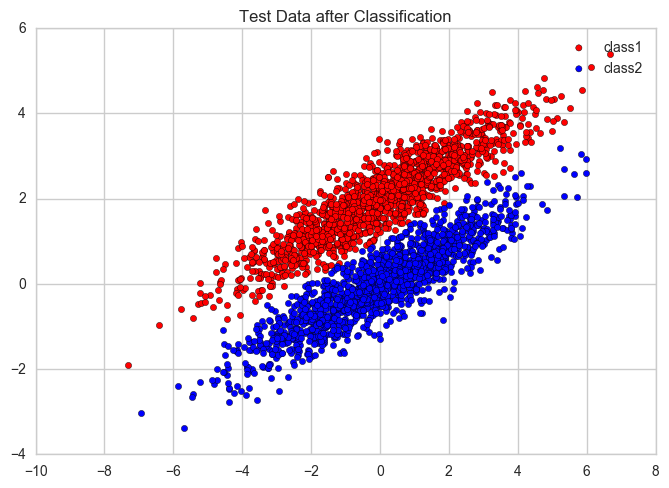

In [4]:
sample1_mean = np.mean(sample1_train,axis = 0)
sample2_mean = np.mean(sample2_train,axis = 0)
sample1_cov = np.cov(sample1_train[:,0],sample1_train[:,1])
sample2_cov = np.cov(sample2_train[:,0],sample2_train[:,1])

def g(sample_test):  
    term_1 = np.log(1./(np.linalg.det(sample1_cov)*0.5))-0.5 * (sample_test - sample1_mean) .dot (np.linalg.inv(sample1_cov)) .dot ((sample_test - sample1_mean).T)
    term_2 = np.log(1./(np.linalg.det(sample2_cov)*0.5)) -0.5 * (sample_test - sample2_mean) .dot (np.linalg.inv(sample2_cov)) .dot ((sample_test - sample2_mean).T)    
    return (term_1 - term_2)
                                                                                         
                                                                                         

w11_0 = []
w11_1 = []
w12_0 = []
w12_1 = []

for i in range(2*N):
    if (g(sample_test[i]) >= 0):
        w11_0.append(sample_test[i][0])
        w11_1.append(sample_test[i][1])
    else:
        w12_0.append(sample_test[i][0])
        w12_1.append(sample_test[i][1])
w11 = np.zeros((len(w11_0),2))
w11[:,0] = w11_0
w11[:,1] = w11_1
w12 = np.zeros((len(w12_0),2))
w12[:,0] = w12_0
w12[:,1] = w12_1


plt.scatter(w11_0,w11_1,label='class1',c = 'r')
plt.scatter(w12_0,w12_1,label='class2',c = 'b')
plt.legend()
plt.title('Test Data after Classification')
plt.show()



In [5]:
w1 = np.zeros((2*N,3))
w1[:len(w11),:2] = w11
w1[:len(w11),2] = 0
w1[len(w11):,:2] = w12
w1[len(w11):,2] = 1

sample_test_to = np.zeros((2*N,3))
sample_test_to[:len(sample1_test),:2] = sample1_test
sample_test_to[:len(sample1_test),2] = 0
sample_test_to[len(sample2_test):,:2] = sample2_test
sample_test_to[len(sample2_test):,2] = 1



### Calculate the error

In [6]:
sum_c1 = 0
for ele_w1 in w1:
    for ele_s in sample_test_to:
        if ((ele_w1== ele_s).all() == True):
            sum_c1 += 1

print ('Classification error',(2*N - sum_c1))

Classification error 24


## Logistic Regression

### Take a look at the training set

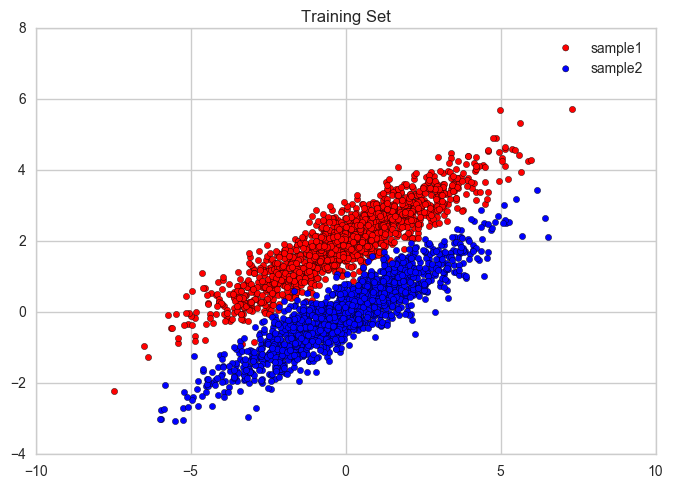

In [7]:
mean1 = [0,2]
mean2 = [0,0]
cov = [[4,1.8],[1.8,1]]
N = 1500
sample1_train = np.random.multivariate_normal(mean1, cov, N)
sample2_train = np.random.multivariate_normal(mean2, cov, N)
plt.title('Training Set')
plt.scatter(sample1_train[:,0],sample1_train[:,1],label='sample1',c = 'r')
plt.scatter(sample2_train[:,0],sample2_train[:,1],label='sample2',c ='b')
plt.legend()
sample1_test = np.random.multivariate_normal(mean1, cov, N)
sample2_test = np.random.multivariate_normal(mean2, cov, N)

sample_test = np.zeros((2*N,3))

sample_test[:N,:2] = sample1_test
sample_test[N:,:2] = sample2_test
sample_test[:,2] = 1
#sample_test

Optimized theta: [  4.71231029 -10.61262577  10.5941364 ]


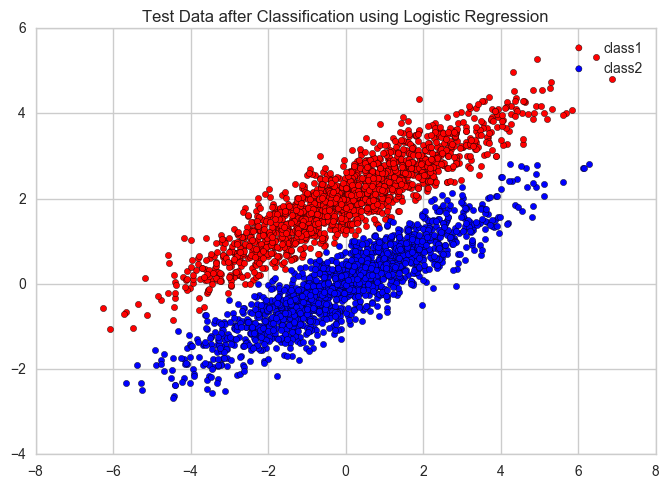

In [8]:
y = np.zeros(2*N)
y[:N] = 0
y[N:] = 1

x = np.zeros((2*N,3))
x[:N,:2] = sample1_train
x[N:,:2] = sample2_train
x[:,2] = 1




def logit(X, theta):
    m = np.exp(np.dot(X,theta))
    return m/(1+m)

def D(x):
    m=np.multiply(x,(1-x)).reshape((len(x),))
    return np.diag(m)


import scipy
theta0 = np.zeros(3)

func = lambda theta: -np.dot(x,theta).T.dot(y) + np.sum(np.log(1+np.exp(np.dot(x,theta))))
f1 = lambda theta: -np.dot(x.T,(y-logit(x,theta)))
f2 = lambda theta: x.T .dot(D(logit(x,theta))) .dot (x)

ite = 1000
threshold = 1e-5
theta_list = []

def newton(ite,threshold,theta0):
    for i in range (ite):
        theta = theta0
        theta_list.append(theta)
        
        theta_update = theta - np.linalg.inv(f2(theta)) .dot(f1(theta))
        if ((abs(theta_update[0] - theta[0])<threshold) and (abs(theta_update[1] - theta[1])< threshold) and (abs(theta_update[2] - theta[2])< threshold)):
            print ('Optimized theta:',theta)
            break
        theta0 = theta_update
    return(theta_list)

theta_optimized = newton(ite,threshold,theta0)[-1]
g = logit(sample_test, theta_optimized)

w1_0 = []
w1_1 = []
w1_2 = []

w2_0 = []
w2_1 = []
w2_2 = []
for i in range(len(g)):
    if (g[i] <= 0.5):
        w1_0.append(sample_test[i][0])
        w1_1.append(sample_test[i][1])
        w1_2.append(sample_test[i][2])
    else:
        w2_0.append(sample_test[i][0])
        w2_1.append(sample_test[i][1])
        w2_2.append(sample_test[i][2])
        
w1 = np.zeros((len(w1_0),3))
w1[:,0] = w1_0
w1[:,1] = w1_1
w1[:,2] = w1_2

w2 = np.zeros((len(w2_0),3))
w2[:,0] = w2_0
w2[:,1] = w2_1
w2[:,2] = w2_2


plt.scatter(w1_0,w1_1,label='class1',c = 'r')
plt.scatter(w2_0,w2_1,label='class2',c = 'b')
plt.legend()
plt.title('Test Data after Classification using Logistic Regression')
plt.show()



In [9]:
sample_test = np.zeros((2*N,4))

sample_test[:N,:2] = sample1_test
sample_test[:,2] = 1
sample_test[:N,3] = 0
sample_test[N:,:2] = sample2_test
sample_test[N:,3] = 1

w_c = np.zeros((2*N,4))
w_c[:len(w1),:3] = w1
w_c[:len(w1),3] = 0
w_c[len(w1):,:3] = w2
w_c[len(w1):,3] = 1

sum_c1 = 0
for ele_w1 in w_c:
    for ele_s in sample_test:
        if ((ele_w1== ele_s).all() == True):
            sum_c1 += 1

print ('Classification error',(2*N - sum_c1))

Classification error 32



## When the corvariance of two class data is different,

### Using Bayes decision rule

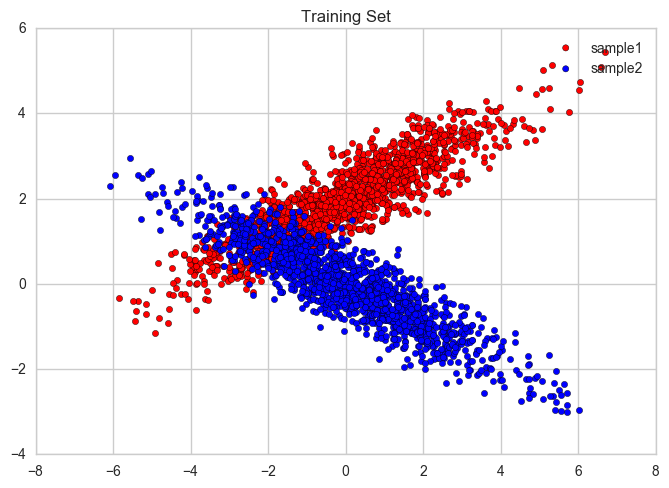

In [10]:
mean1 = [0,2]
mean2 = [0,0]
cov1 = [[4,1.8],[1.8,1]]
cov2 = [[4,-1.8],[-1.8,1]]
N = 1500
sample1_train = np.random.multivariate_normal(mean1, cov1, N)
sample2_train = np.random.multivariate_normal(mean2, cov2, N)
plt.title('Training Set')
plt.scatter(sample1_train[:,0],sample1_train[:,1],label='sample1',c = 'r')
plt.scatter(sample2_train[:,0],sample2_train[:,1],label='sample2',c ='b')
plt.legend()
sample1_test = np.random.multivariate_normal(mean1, cov1, N)
sample2_test = np.random.multivariate_normal(mean2, cov2, N)

sample_test = np.zeros((2*N,2))
sample_test[:N,:] = sample1_test
sample_test[N:,:] = sample2_test

sample1_cov = np.cov(sample1_train[:,0],sample1_train[:,1])
sample2_cov = np.cov(sample2_train[:,0],sample2_train[:,1])


In [11]:
sample2_cov

array([[ 3.88356785, -1.72958329],
       [-1.72958329,  0.9664726 ]])

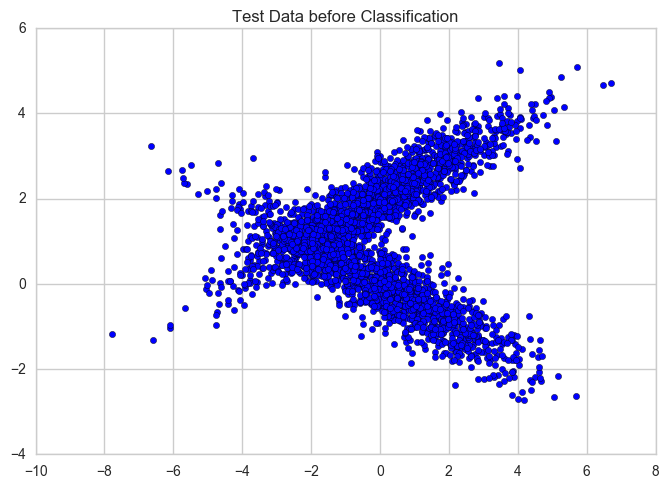

In [12]:
plt.scatter(sample_test[:,0],sample_test[:,1],label='test_mix',c ='b')
plt.title('Test Data before Classification')
plt.show()

In [13]:

sample1_mean_array = np.zeros((len(sample_test),2))
sample1_mean_array[:] = sample1_mean
sample1_mean_array

sample2_mean_array = np.zeros((len(sample_test),2))
sample2_mean_array[:] = sample2_mean
sample2_mean_array


array([[-0.013677  , -0.00959261],
       [-0.013677  , -0.00959261],
       [-0.013677  , -0.00959261],
       ..., 
       [-0.013677  , -0.00959261],
       [-0.013677  , -0.00959261],
       [-0.013677  , -0.00959261]])

In [14]:
sample1_mean_array.shape

(3000, 2)

In [15]:
sample_test.shape

(3000, 2)

In [16]:
sample1_cov.shape
sample1_mean

array([ 0.02095868,  2.0233521 ])

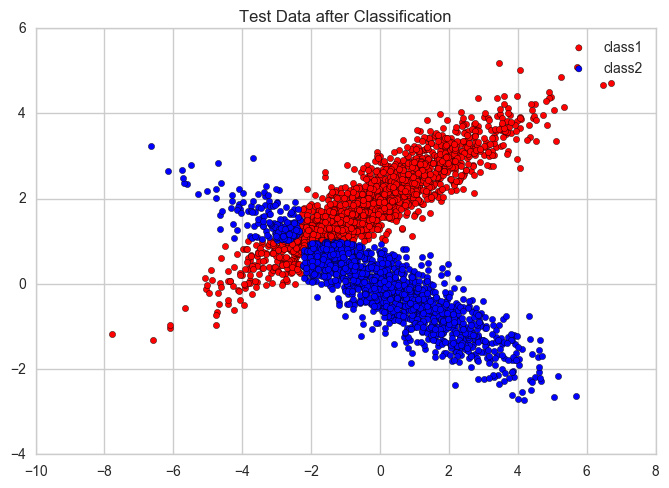

In [17]:
sample1_mean = np.mean(sample1_train,axis = 0)
sample2_mean = np.mean(sample2_train,axis = 0)
sample1_cov = np.cov(sample1_train[:,0],sample1_train[:,1])
sample2_cov = np.cov(sample2_train[:,0],sample2_train[:,1])

def g(sample_test):  
    term_1 = np.log(1./(np.linalg.det(sample1_cov)*0.5))-0.5 * (sample_test - sample1_mean) .dot (np.linalg.inv(sample1_cov)) .dot ((sample_test - sample1_mean).T)
    term_2 = np.log(1./(np.linalg.det(sample2_cov)*0.5))-0.5 * (sample_test - sample2_mean) .dot (np.linalg.inv(sample2_cov)) .dot ((sample_test - sample2_mean).T)    
    return (term_1 - term_2)
                                                                                         
                                                                                         

w1_0 = []
w1_1 = []
w2_0 = []
w2_1 = []

for i in range(2*N):
    if (g(sample_test[i]) >= 0):
        w1_0.append(sample_test[i][0])
        w1_1.append(sample_test[i][1])
    else:
        w2_0.append(sample_test[i][0])
        w2_1.append(sample_test[i][1])
w1 = np.zeros((len(w1_0),2))
w1[:,0] = w1_0
w1[:,1] = w1_1
w2 = np.zeros((len(w2_0),2))
w2[:,0] = w2_0
w2[:,1] = w2_1


plt.scatter(w1_0,w1_1,label='class1',c = 'r')
plt.scatter(w2_0,w2_1,label='class2',c = 'b')
plt.legend()
plt.title('Test Data after Classification')
plt.show()



In [18]:
w2_c = np.zeros((2*N,3))
w2_c[:len(w1),:2] = w1
w2_c[:len(w1),2] = 0
w2_c[len(w1):,:2] = w2
w2_c[len(w1):,2] = 1

sample_test_to1 = np.zeros((2*N,3))
sample_test_to1[:len(sample1_test),:2] = sample1_test
sample_test_to1[:len(sample1_test),2] = 0
sample_test_to1[len(sample2_test):,:2] = sample2_test
sample_test_to1[len(sample2_test):,2] = 1



In [19]:
sum_c1 = 0
for ele_w1 in w2_c:
    for ele_s in sample_test_to1:
        if ((ele_w1== ele_s).all() == True):
            sum_c1 += 1

print ('Classification error',(2*N - sum_c1))

Classification error 278


### Using Logistic Regression

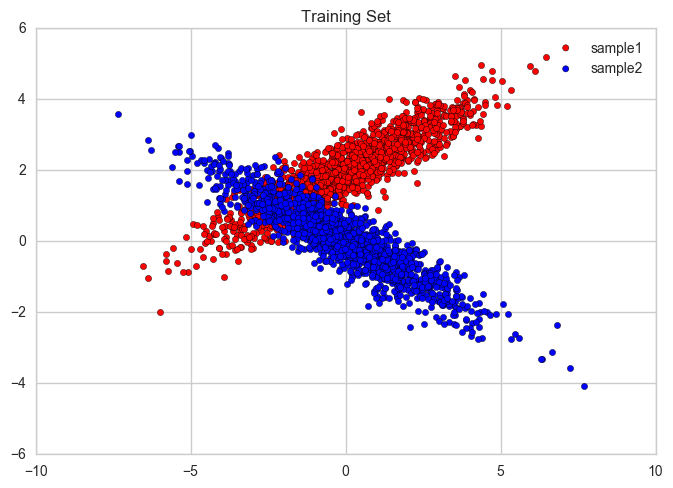

In [20]:
mean1 = [0,2]
mean2 = [0,0]
cov1 = [[4,1.8],[1.8,1]]
cov2 = [[4,-1.8],[-1.8,1]]

N = 1500
sample1_train = np.random.multivariate_normal(mean1, cov1, N)
sample2_train = np.random.multivariate_normal(mean2, cov2, N)
plt.title('Training Set')
plt.scatter(sample1_train[:,0],sample1_train[:,1],label='sample1',c = 'r')
plt.scatter(sample2_train[:,0],sample2_train[:,1],label='sample2',c ='b')
plt.legend()
sample1_test = np.random.multivariate_normal(mean1, cov1, N)
sample2_test = np.random.multivariate_normal(mean2, cov2, N)

sample_test = np.zeros((2*N,3))

sample_test[:N,:2] = sample1_test
sample_test[N:,:2] = sample2_test
sample_test[:,2] = 1
#sample_test

Optimized theta: [-0.03408479 -1.95018776  1.95954902]


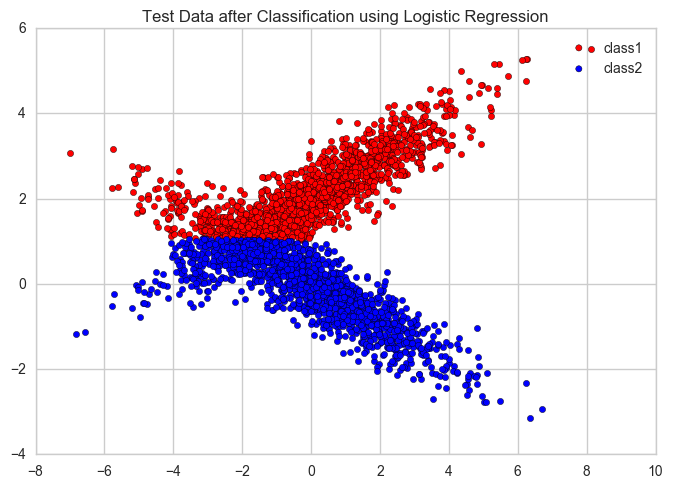

In [21]:
def nll(theta,y,x):
    negl = 0
    for i in range(N):
        negl += -y[i]* np.dot(theta,x[i,:]) + np.log(1+np.exp(np.dot(theta,x[i,:])))    
    return negl


x = np.zeros((2*N,3))
x[:N,:2] = sample1_train
x[N:,:2] = sample2_train
x[:,2] = 1

y = np.zeros(2*N)
y[:N] = 0
y[N:] = 1


def logit(X, theta):
    m = np.exp(np.dot(X,theta))
    return m/(1+m)

def D(x):
    m=np.multiply(x,(1-x)).reshape((len(x),))
    return np.diag(m)


import scipy
theta0 = np.zeros(3)

func = lambda theta: -np.dot(x,theta).T.dot(y) + np.sum(np.log(1+np.exp(np.dot(x,theta))))
f1 = lambda theta: -np.dot(x.T,(y-logit(x,theta)))
f2 = lambda theta: x.T .dot(D(logit(x,theta))) .dot (x)

ite = 1000
threshold = 1e-5
theta_list = []

def newton(ite,threshold,theta0):
    for i in range (ite):
        theta = theta0
        theta_list.append(theta)
        
        theta_update = theta - np.linalg.inv(f2(theta)) .dot(f1(theta))
        if ((abs(theta_update[0] - theta[0])<threshold) and (abs(theta_update[1] - theta[1])< threshold) and (abs(theta_update[2] - theta[2])< threshold)):
            print ('Optimized theta:',theta)
            break
        theta0 = theta_update
    return(theta_list)

theta_optimized = newton(ite,threshold,theta0)[-1]
g = logit(sample_test, theta_optimized)

w1_0 = []
w1_1 = []
w1_2 = []

w2_0 = []
w2_1 = []
w2_2 = []
for i in range(len(g)):
    if (g[i] <= 0.5):
        w1_0.append(sample_test[i][0])
        w1_1.append(sample_test[i][1])
        w1_2.append(sample_test[i][2])
    else:
        w2_0.append(sample_test[i][0])
        w2_1.append(sample_test[i][1])
        w2_2.append(sample_test[i][2])
        
w1 = np.zeros((len(w1_0),3))
w1[:,0] = w1_0
w1[:,1] = w1_1
w1[:,2] = w1_2

w2 = np.zeros((len(w2_0),3))
w2[:,0] = w2_0
w2[:,1] = w2_1
w2[:,2] = w2_2


plt.scatter(w1_0,w1_1,label='class1',c = 'r')
plt.scatter(w2_0,w2_1,label='class2',c = 'b')
plt.legend()
plt.title('Test Data after Classification using Logistic Regression')
plt.show()



In [22]:
sample_test = np.zeros((2*N,4))

sample_test[:N,:2] = sample1_test
sample_test[:,2] = 1
sample_test[:N,3] = 0
sample_test[N:,:2] = sample2_test
sample_test[N:,3] = 1

w_c = np.zeros((2*N,4))
w_c[:len(w1),:3] = w1
w_c[:len(w1),3] = 0
w_c[len(w1):,:3] = w2
w_c[len(w1):,3] = 1

sum_c1 = 0
for ele_w1 in w_c:
    for ele_s in sample_test:
        if ((ele_w1== ele_s).all() == True):
            sum_c1 += 1

print ('Classification error',(2*N - sum_c1))

Classification error 489
